# Loading Dataset

In [2]:
import pandas as pd
from PIL import Image
import os

image_dir = 'train'

image_data = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        try:
            img = Image.open(image_path)
            # img_data = list(img.getdata())

            # Extract the category from the filename
            category = filename.split('.')[0]

            image_data.append([filename, category])
        except:
            print(f"Failed to load image: {filename}")

df = pd.DataFrame(image_data, columns=['filename', 'category'])

In [3]:
df.head(5)

filename category
0     cat.0.jpg      cat
1     cat.1.jpg      cat
2    cat.10.jpg      cat
3   cat.100.jpg      cat
4  cat.1000.jpg      cat

In [4]:
df.shape

(25000, 2)

In [5]:
print(f"Cats: {df[df['category']=='cat'].shape[0]}")
print(f"Dogs: {df[df['category']=='dog'].shape[0]}")

Cats: 12500
Dogs: 12500


# Loading single images and showing them

In [6]:
import tensorflow as tf
from matplotlib import pyplot

def show_image(category, number_id):
    path_to_image = 'train/' + category + '.' + str(number_id) + '.jpg'
    image = tf.keras.utils.load_img(path_to_image)
    pyplot.imshow(image)

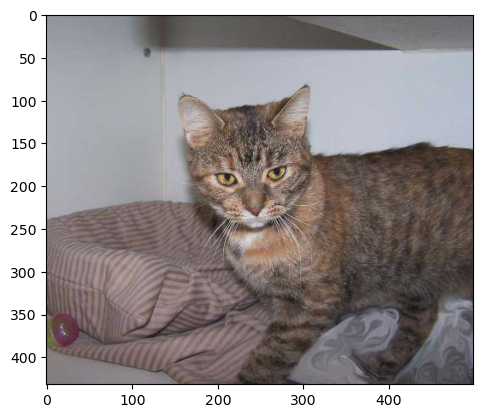

In [7]:
show_image('cat', 2394)

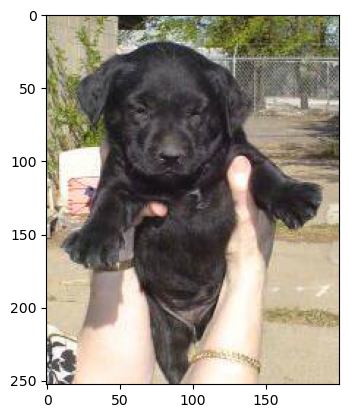

In [8]:
show_image('dog', 329)

# Artificial Intelligence

In [9]:
## Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

model = keras.Sequential()

# First convolution layer
model.add(layers.Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Second convolution layer
model.add(layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Third convolution layer
model.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Fourth convolution layer
model.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Sixth convolution layer
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))

# Last convolution layer - Multiclass Problem
model.add(layers.Dense(2, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
# df["category"] = df["category"].map({0: 'cat', 1: 'dog'})

from sklearn.model_selection import train_test_split
train_df, validation_df = train_test_split(df, test_size=0.20, random_state=13)

train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)

(20000, 2)
(5000, 2)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe = train_df, directory = "train", x_col = "filename", y_col = "category", target_size = (150,150), batch_size = 200, class_mode = "categorical")
validation_generator = validation_datagen.flow_from_dataframe(dataframe = validation_df, directory = "train", x_col = "filename", y_col = "category", target_size = (150,150), batch_size = 200, class_mode = "categorical")

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(200, 150, 150, 3)
(200, 2)


In [15]:
model_history = model.fit(train_generator, validation_data=validation_generator, epochs=5, batch_size=1024, steps_per_epoch=100)

Epoch 1/5
100/100 [==============================] - 618s 6s/step - loss: 0.7050 - accuracy: 0.5467 - val_loss: 0.6665 - val_accuracy: 0.6010
Epoch 2/5
100/100 [==============================] - 3042s 31s/step - loss: 0.6375 - accuracy: 0.6291 - val_loss: 0.5983 - val_accuracy: 0.6678
Epoch 3/5
100/100 [==============================] - 589s 6s/step - loss: 0.5706 - accuracy: 0.7010 - val_loss: 0.5242 - val_accuracy: 0.7458
Epoch 4/5
100/100 [==============================] - 904s 9s/step - loss: 0.5173 - accuracy: 0.7388 - val_loss: 0.5845 - val_accuracy: 0.6948
Epoch 5/5
100/100 [==============================] - 2193s 22s/step - loss: 0.4743 - accuracy: 0.7722 - val_loss: 0.4456 - val_accuracy: 0.7950


In [16]:
model.save('./model.h5')

In [17]:
test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
 'filename': test_filenames
})
test_df.shape[0]

12500

In [18]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
 test_df,
 directory="test1",
 x_col='filename',
 y_col=None,
 class_mode=None,
 target_size=(150,150),
 batch_size=32,
 shuffle=False
)

Found 12500 validated image filenames.


In [19]:
test_generator.reset()
pred=model.predict(test_generator, verbose=1)

391/391 [==============================] - 139s 356ms/step


In [20]:
pred

array([[0.14677425, 0.8532257 ],
       [0.72983056, 0.2701695 ],
       [0.66451186, 0.33548817],
       ...,
       [0.20160212, 0.79839784],
       [0.7250702 , 0.27492988],
       [0.36735842, 0.63264155]], dtype=float32)

In [22]:
import numpy as np
pred_rounded = np.argmax(pred, axis=-1)
test_df["category"] = pred_rounded
test_df.head(10) 

filename  category
0      1.jpg         1
1     10.jpg         0
2    100.jpg         0
3   1000.jpg         1
4  10000.jpg         1
5  10001.jpg         0
6  10002.jpg         0
7  10003.jpg         1
8  10004.jpg         0
9  10005.jpg         0

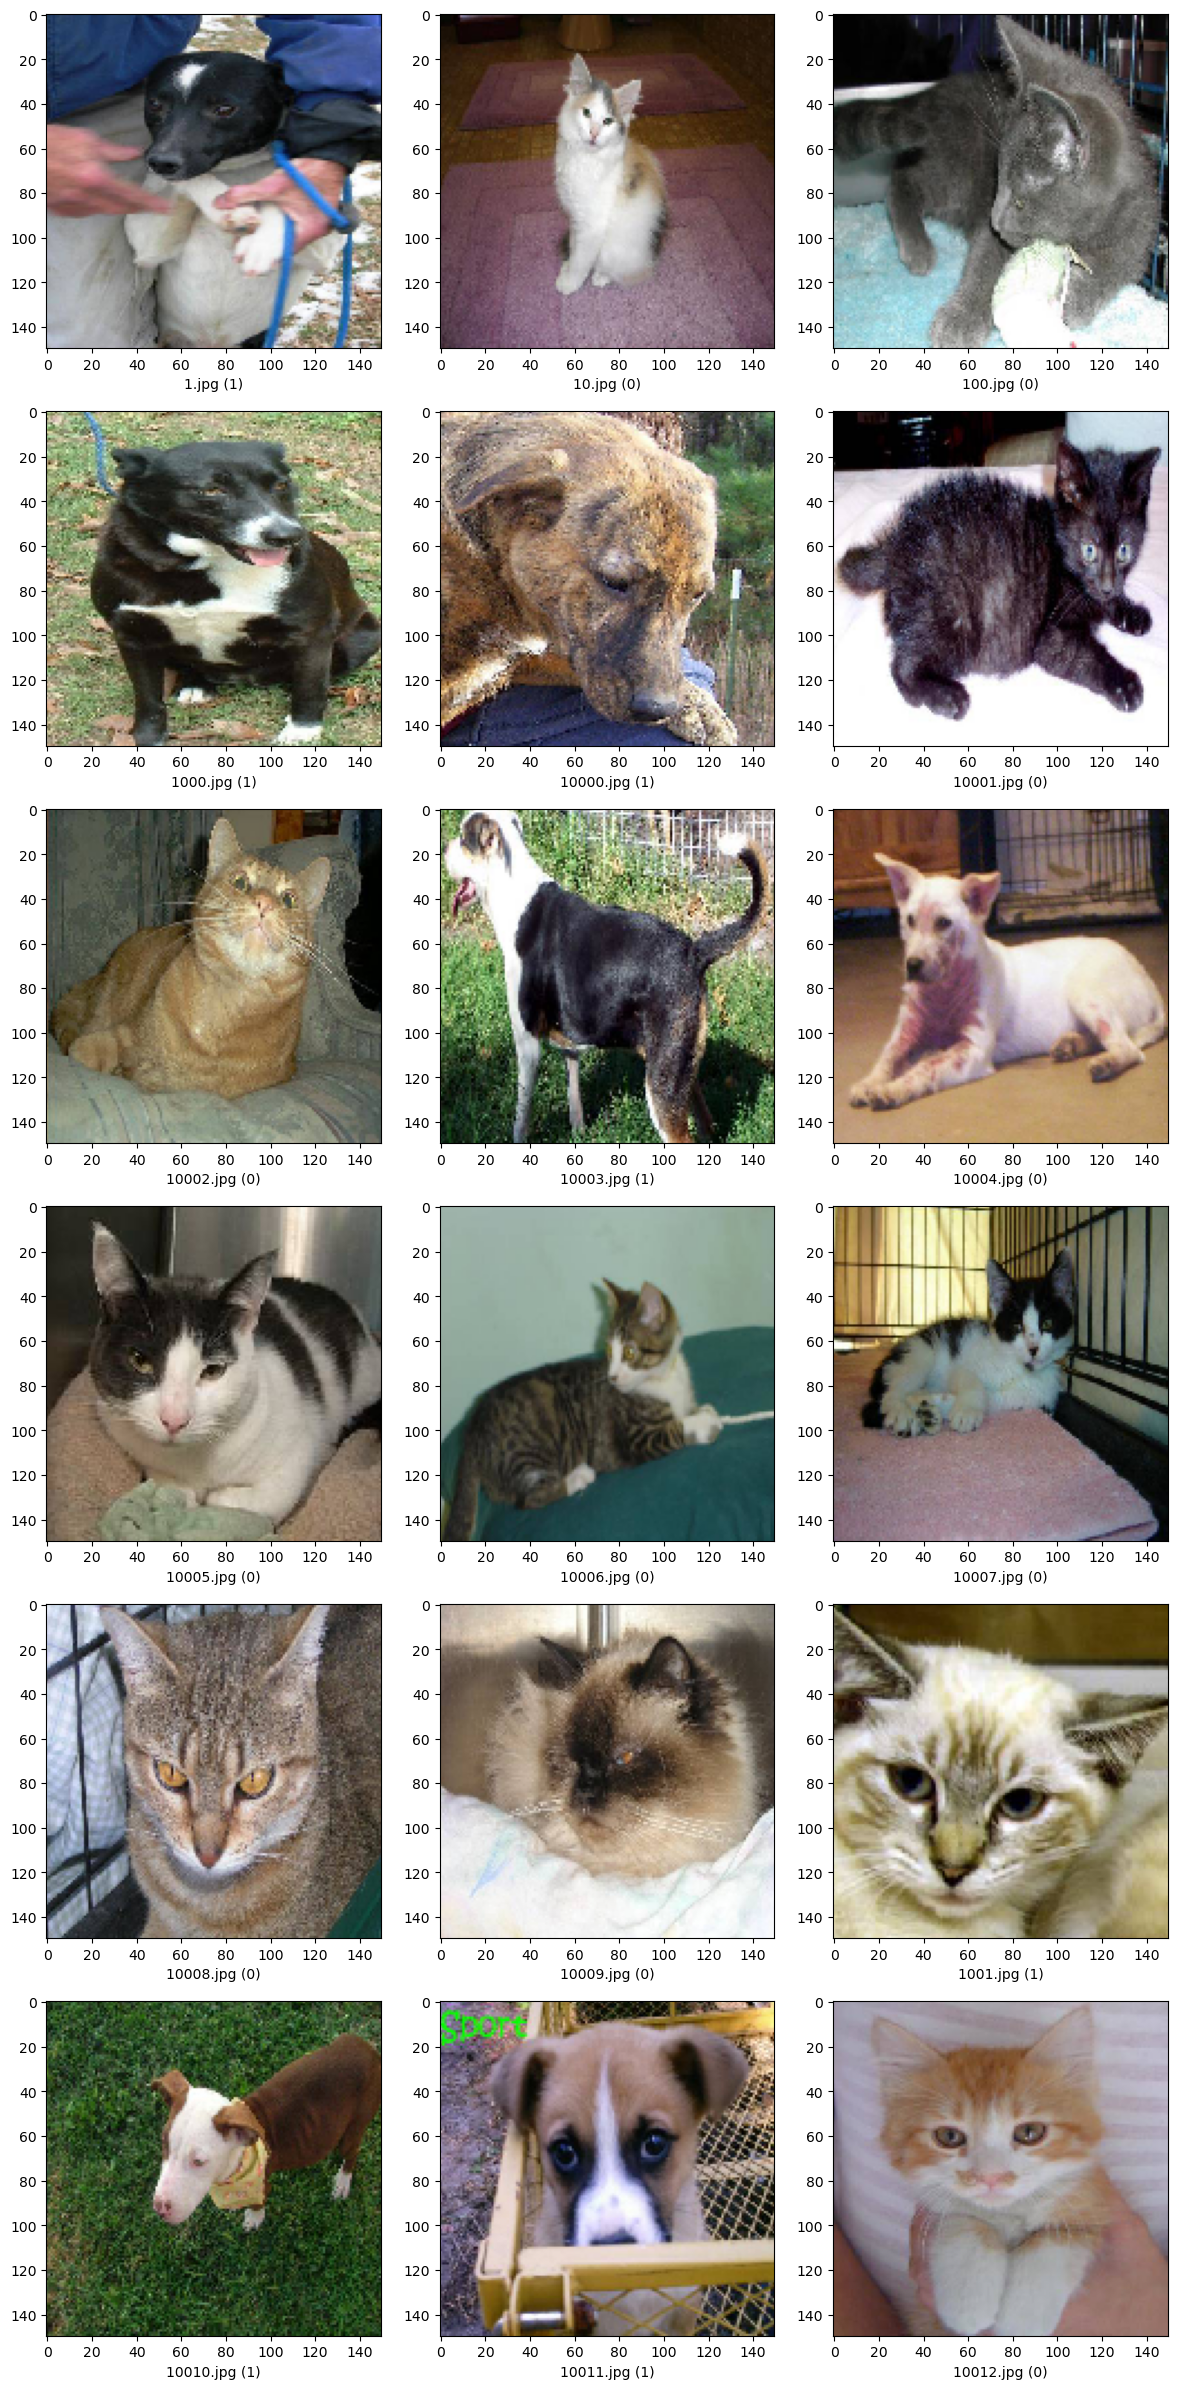

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test1/"+filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(f"{filename} ({category})")
plt.tight_layout()
plt.show()

In [26]:
train_generator.class_indices.items()

dict_items([('cat', 0), ('dog', 1)])